<a href="https://colab.research.google.com/github/Muyikem21/Sunday_INFO5731_Spring2021/blob/main/House_Prices_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
def main():
    try:
        with zipfile.ZipFile('assignment4-question3-data.zip') as file:
            print('File size is compatible')
    except zipfile.LargeZipFile:
        print('Error: File size if too large')

if __name__ == '__main__': main()

File size is compatible


This means that the zip file is not too large, so we will not need to enable ZIP64 functionality.

In [ ]:
# viewing the files in the zip file
filename = 'assignment4-question3-data.zip'
with zipfile.ZipFile(filename, 'r') as file:
  print(file.printdir())


File Name                                             Modified             Size
data_description.txt                           2020-04-11 12:02:46        13370
test.csv                                       2020-04-11 12:02:56       451405
train.csv                                      2020-04-11 12:02:42       460676
None


In [ ]:
# unzipping the zip file and extracting the files.
with zipfile.ZipFile(filename, 'r') as file:
  # extracting the files using 'extracall' method
  file.extractall()
  print('Done!')

Done!


We have now unzipped our file and we have our three files:


1.   data_description.txt
2.   test.csv
3.   train.csv



In [ ]:
# previewing the description file
with open('data_description.txt') as description:
    lines = description.read()
    print(lines)

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [ ]:
#loading our train and test dataset
import pandas as pd
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

In [ ]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
train.shape

(1460, 81)

We have 1460 rows and 81 columns.

## **Data Cleaning**

In [ ]:
test.columns= test.columns.str.lower()
train.columns= train.columns.str.lower()

We are going to drop the columns with a high number of non-null variables.

In [ ]:
# determining columns with more than 60 null values.
null_thresh = 60
columns = train.columns
null = train.isnull().sum()
null_value_train = pd.DataFrame({'column_name': columns, 'null_values': null})
null_drop = list(null_value_train[null_value_train.null_values>null_thresh].column_name)
print(null_drop)

['lotfrontage', 'alley', 'fireplacequ', 'garagetype', 'garageyrblt', 'garagefinish', 'garagequal', 'garagecond', 'poolqc', 'fence', 'miscfeature']


In [ ]:
#dropping the columns.
train1 = train.drop(null_drop, axis=1)
train1.shape

(1460, 70)

We have dropped 11 columns, remaining with 70 columns. That is 68 factors to determine the price.

In [ ]:
#filling the missing values with the mode of the respective columns.
for column in train1.columns:
    train1[column].fillna(train1[column].mode()[0], inplace=True)

In [ ]:
# checking for any remaining null values
null_thresh1 = 0
columns1 = train1.columns
null1 = train1.isnull().sum()
null_value_train1 = pd.DataFrame({'column_name': columns1, 'null_values': null1})
null_drop1 = list(null_value_train1[null_value_train1.null_values>null_thresh1].column_name)
print(null_drop1)

[]


In [ ]:
# checking for any remaining missing values
missing_thresh =0
missing = train1.isna().sum()
missing_value_train1 = pd.DataFrame({'column_name': columns1, 'missing_values': missing})
missing_drop = list(missing_value_train1[missing_value_train1.missing_values>missing_thresh].column_name)
print(missing_drop)

[]


We now have no null values nor any missing values.

In [ ]:
# creating a dataset for the numerical variables only
train1_numerical = train1.select_dtypes(include='int64')
numerical_columns = train1_numerical.columns
train1_numerical.shape

(1460, 35)

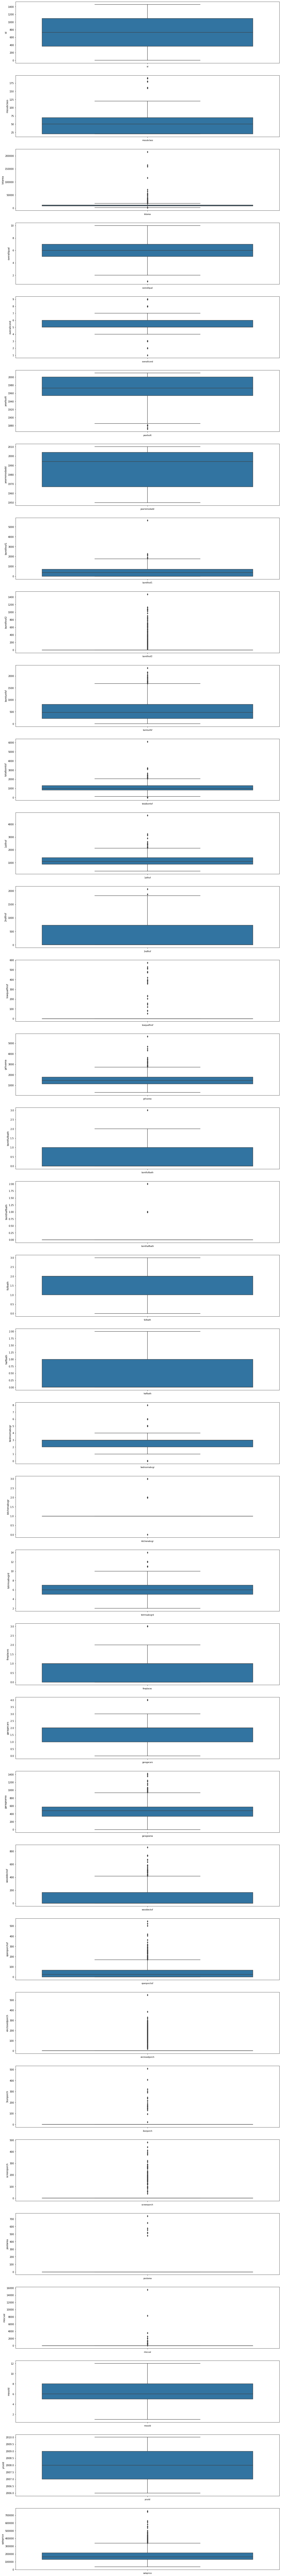

In [ ]:
# plotting outliers
import matplotlib.pyplot as plt
import seaborn as sns
columns_numerical = train1_numerical.columns
fig, ax = plt.subplots(len(columns_numerical), figsize = (20, 200))

for i, col_val in enumerate(columns_numerical):

  sns.boxplot(y= train1_numerical[col_val], ax=ax[i])
  ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

We are going to drop the basement half bathroom and the kitchen above grade columns since they seem not to have many useful values.

In [ ]:
# dropping the said columns
train1 = train1.drop(['bsmthalfbath','kitchenabvgr'], axis=1)
train1_numerical1 = train1.select_dtypes(include='int64')
train1.shape

(1460, 68)

We now have 68 columns, 66 factors.

In [ ]:
# determining the z-score for our values
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(train1_numerical1))
print(z)

[[1.73086488 0.07337496 0.20714171 ... 1.5991111  0.13877749 0.34727322]
 [1.7284922  0.87256276 0.09188637 ... 0.48911005 0.61443862 0.00728832]
 [1.72611953 0.07337496 0.07347998 ... 0.99089135 0.13877749 0.53615372]
 ...
 [1.72611953 0.30985939 0.14781027 ... 0.48911005 1.64520971 1.07761115]
 [1.7284922  0.87256276 0.08016039 ... 0.8591104  1.64520971 0.48852299]
 [1.73086488 0.87256276 0.05811155 ... 0.1191097  0.13877749 0.42084081]]


In [ ]:
# removing outliers based on a z-score maximum of 4
train1_numerical2 = train1_numerical1[(z < 4).all(axis=1)]
train1_numerical2.shape

(1319, 33)

In [ ]:
# picking out the id numbers for selection in the larger dataset
index_nos = train1_numerical2['id'].values

In [ ]:
# setting Id as the index and singling out our desired values
train2 = train1.set_index(['id'])
train2 = train2.loc[train2.index.isin(index_nos)]
train2.shape

(1319, 67)

We are now going to drop several unnecessary columns and those that we do not want influencing our price determination.

In [ ]:
clean_data = train2
clean_data.shape

NameError: ignored

We have managed to remove outliers based on the z-score, remove the unnecessary columns and now we have 1319 rows and 67 columns. 66 factors to predict the price for houses.

## **Data Exploration**

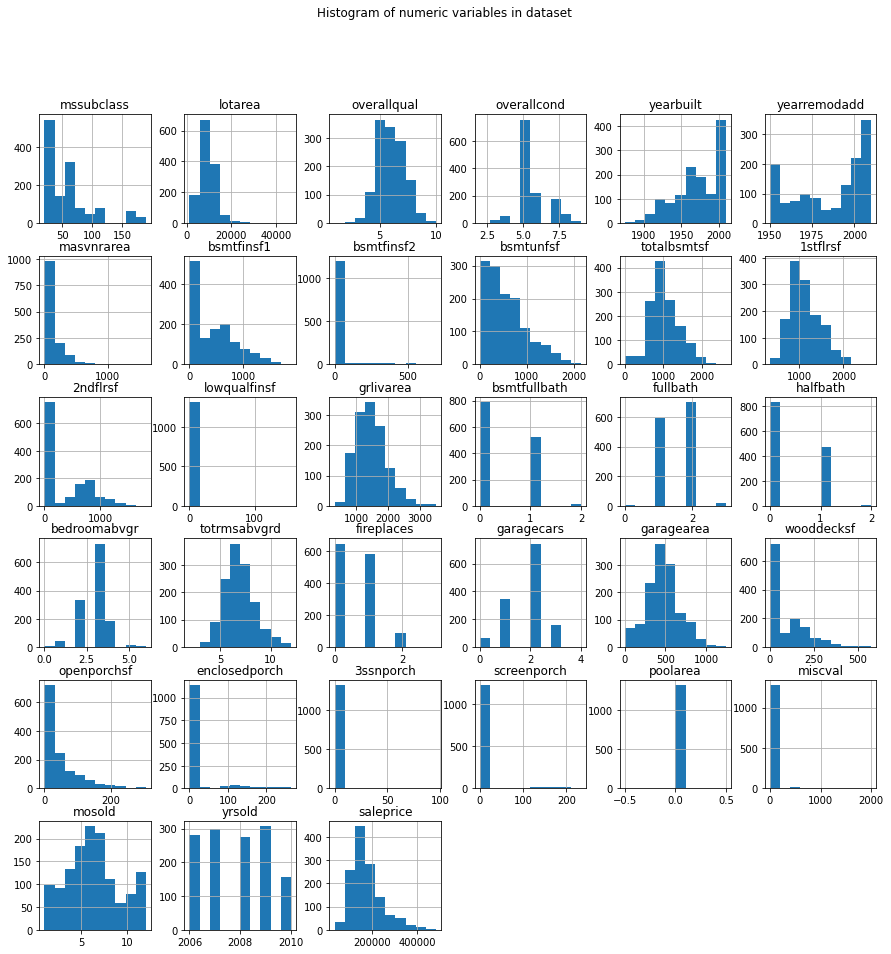

In [ ]:
# plotting histograms for our dataset
clean_data.hist(bins=10, figsize=(15,15))
plt.suptitle("Histogram of numeric variables in dataset")
plt.show()

No handles with labels found to put in legend.


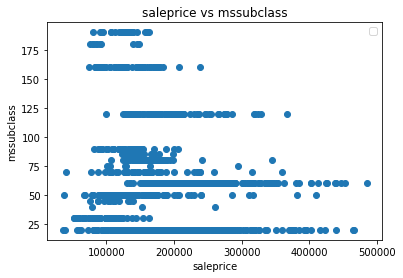

No handles with labels found to put in legend.


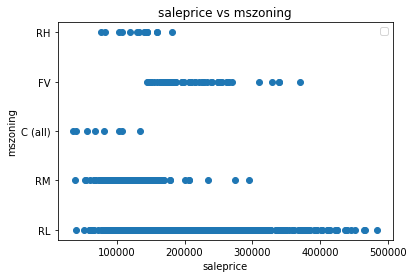

No handles with labels found to put in legend.


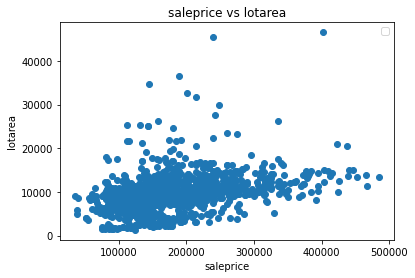

No handles with labels found to put in legend.


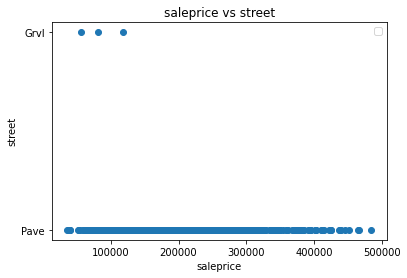

No handles with labels found to put in legend.


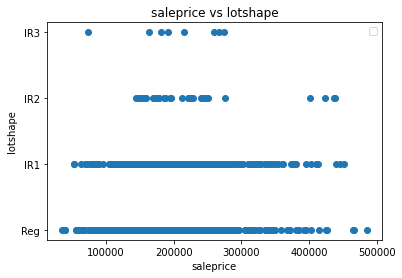

No handles with labels found to put in legend.


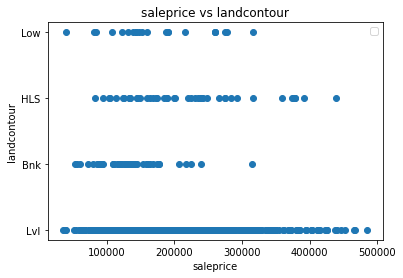

No handles with labels found to put in legend.


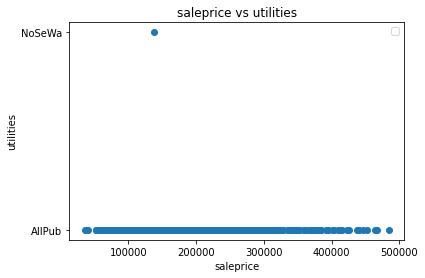

No handles with labels found to put in legend.


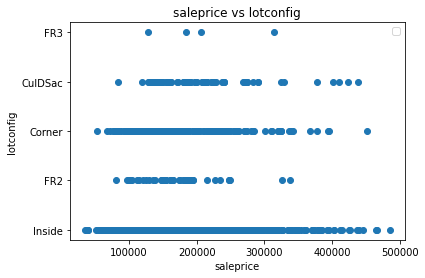

No handles with labels found to put in legend.


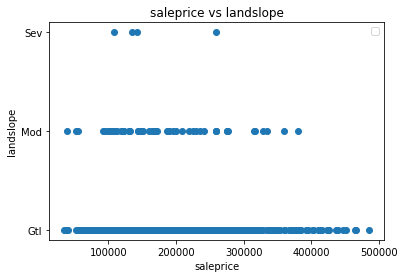

No handles with labels found to put in legend.


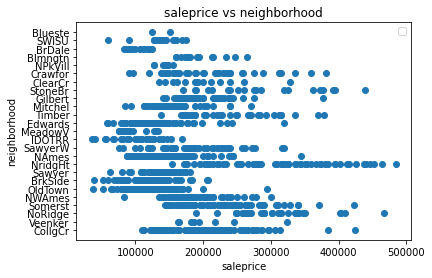

No handles with labels found to put in legend.


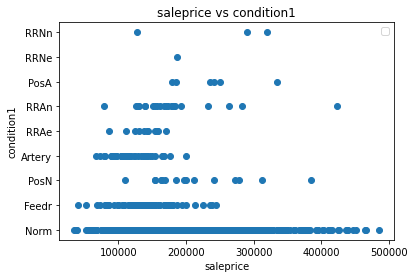

No handles with labels found to put in legend.


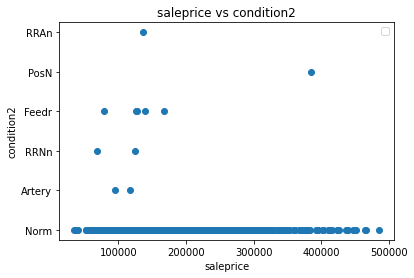

No handles with labels found to put in legend.


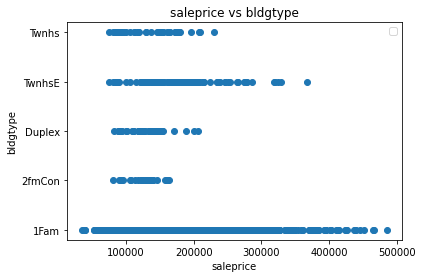

No handles with labels found to put in legend.


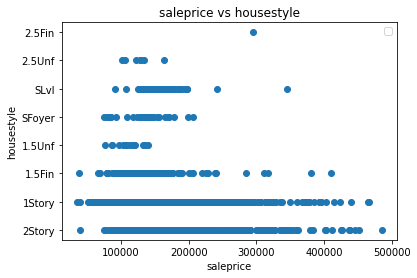

No handles with labels found to put in legend.


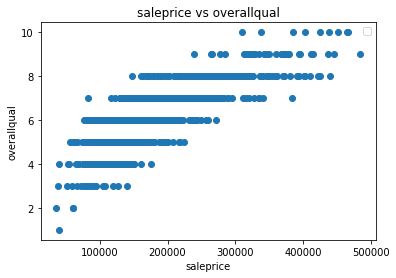

No handles with labels found to put in legend.


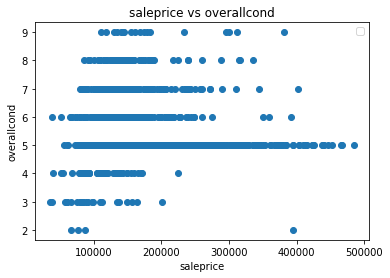

No handles with labels found to put in legend.


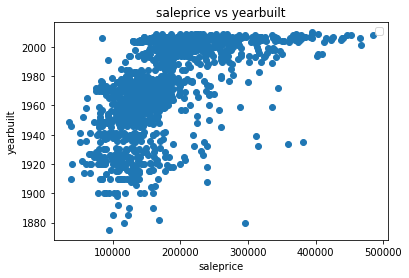

No handles with labels found to put in legend.


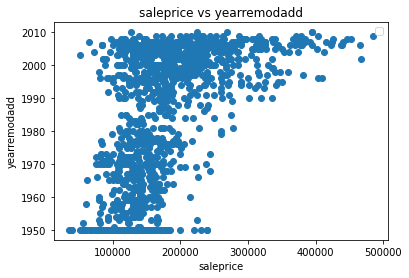

No handles with labels found to put in legend.


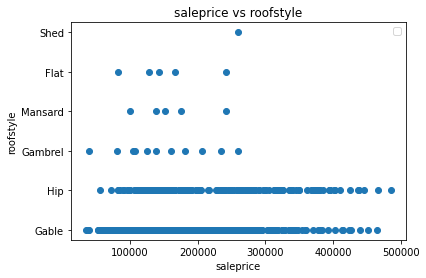

No handles with labels found to put in legend.


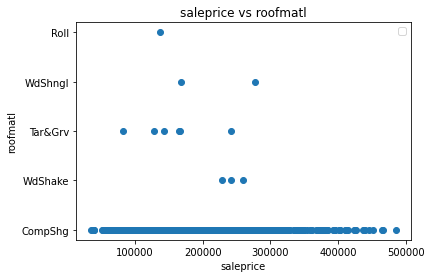

No handles with labels found to put in legend.


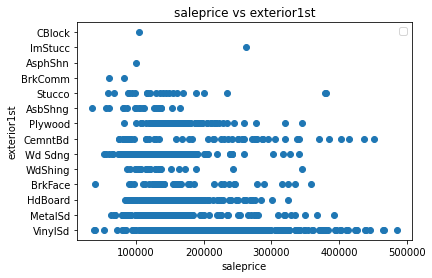

No handles with labels found to put in legend.


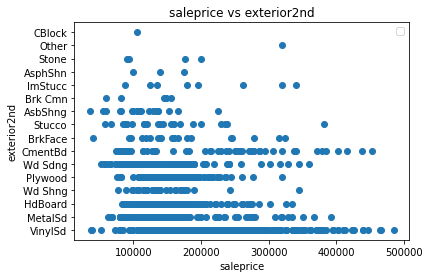

No handles with labels found to put in legend.


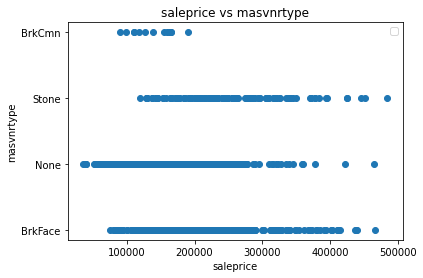

No handles with labels found to put in legend.


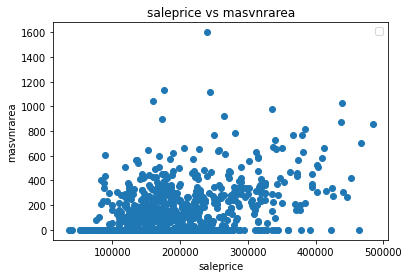

No handles with labels found to put in legend.


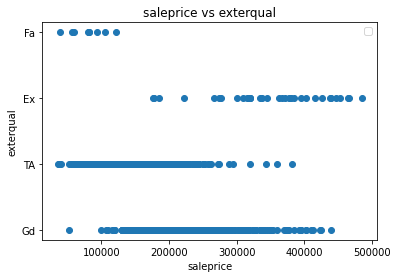

No handles with labels found to put in legend.


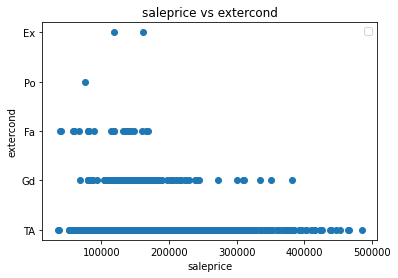

No handles with labels found to put in legend.


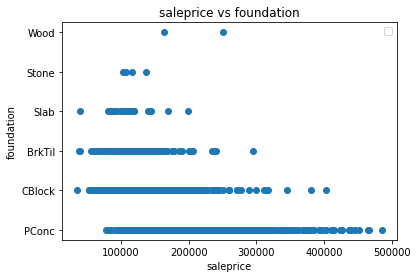

No handles with labels found to put in legend.


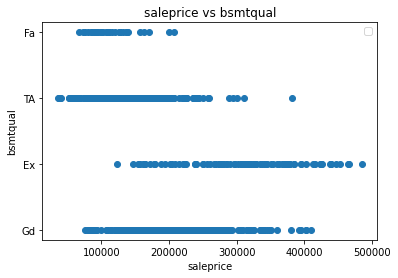

No handles with labels found to put in legend.


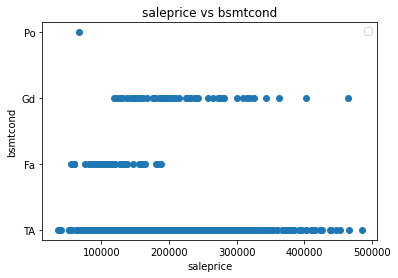

No handles with labels found to put in legend.


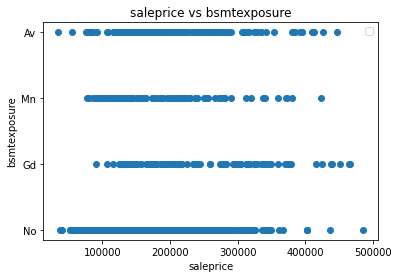

No handles with labels found to put in legend.


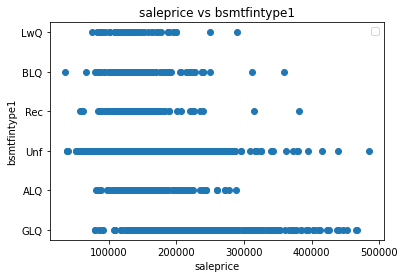

No handles with labels found to put in legend.


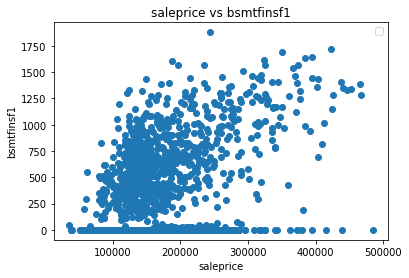

No handles with labels found to put in legend.


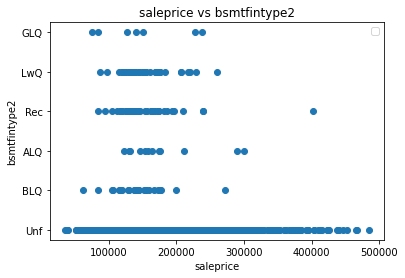

No handles with labels found to put in legend.


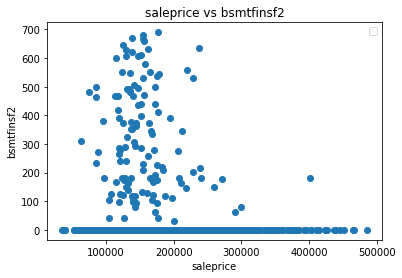

No handles with labels found to put in legend.


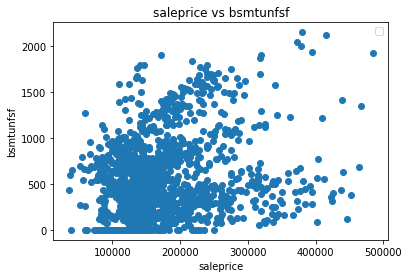

No handles with labels found to put in legend.


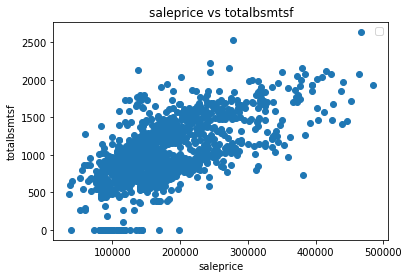

No handles with labels found to put in legend.


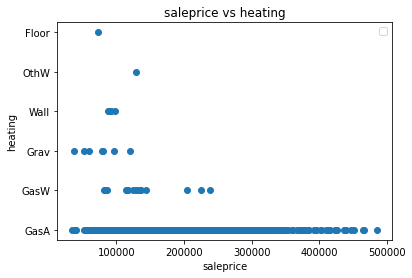

No handles with labels found to put in legend.


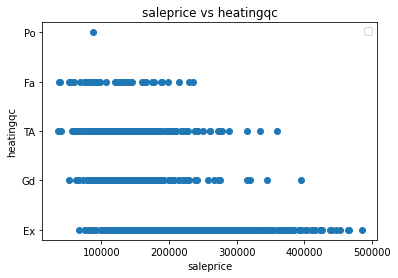

No handles with labels found to put in legend.


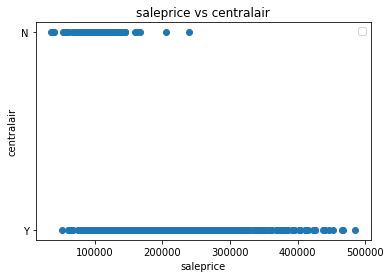

No handles with labels found to put in legend.


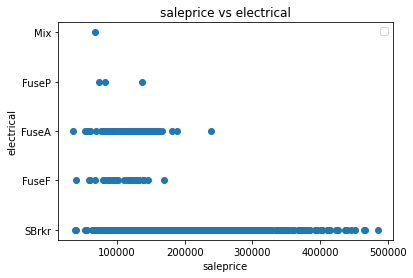

No handles with labels found to put in legend.


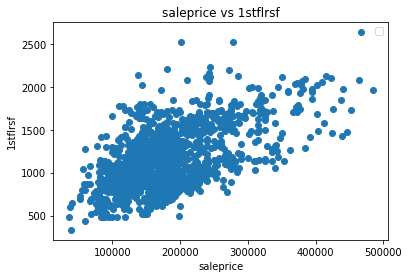

No handles with labels found to put in legend.


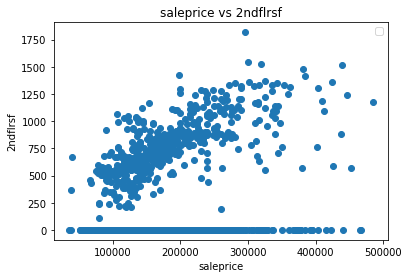

No handles with labels found to put in legend.


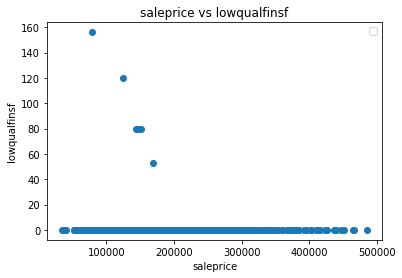

No handles with labels found to put in legend.


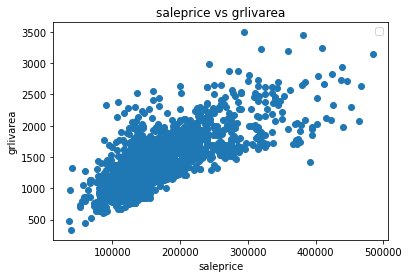

No handles with labels found to put in legend.


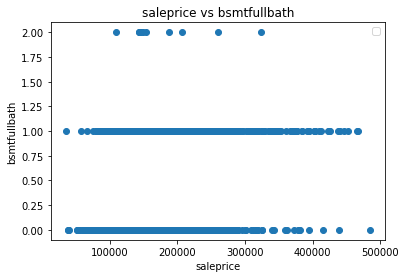

No handles with labels found to put in legend.


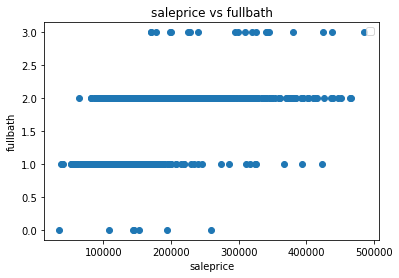

No handles with labels found to put in legend.


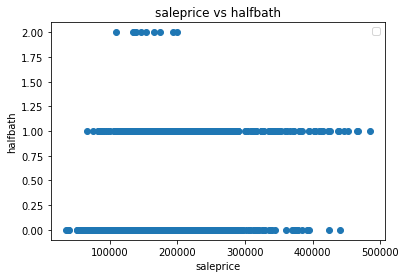

No handles with labels found to put in legend.


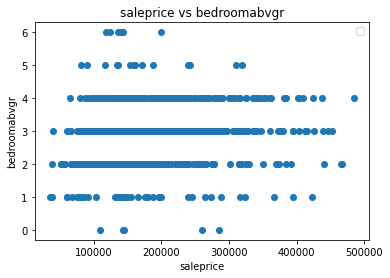

No handles with labels found to put in legend.


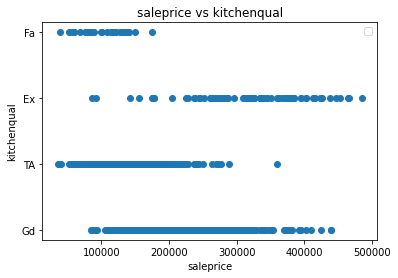

No handles with labels found to put in legend.


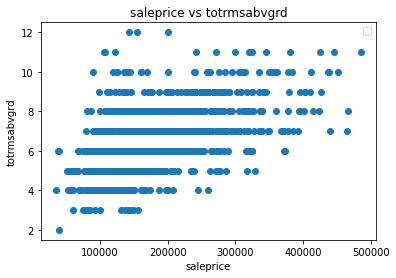

No handles with labels found to put in legend.


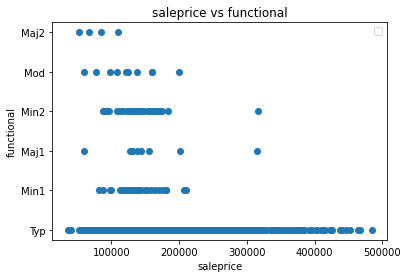

No handles with labels found to put in legend.


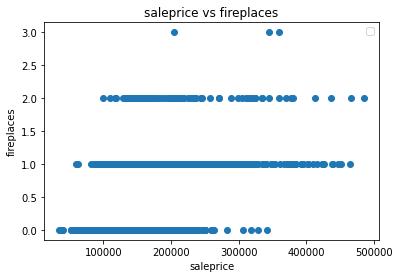

No handles with labels found to put in legend.


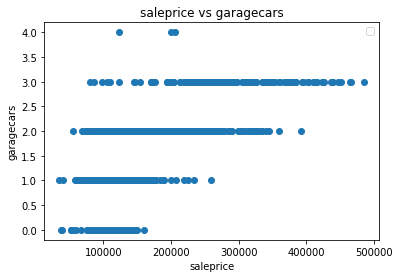

No handles with labels found to put in legend.


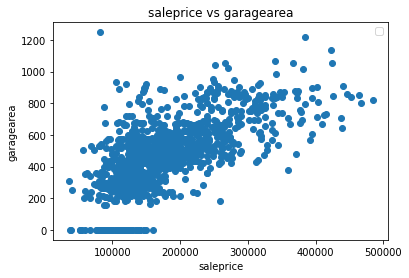

No handles with labels found to put in legend.


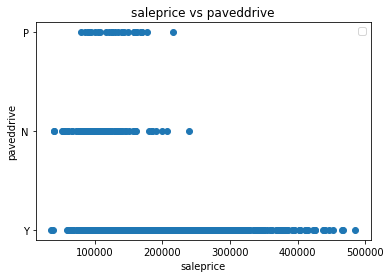

No handles with labels found to put in legend.


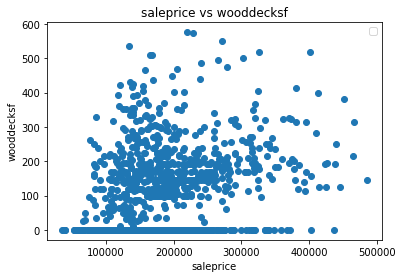

No handles with labels found to put in legend.


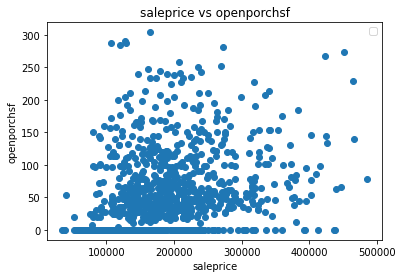

No handles with labels found to put in legend.


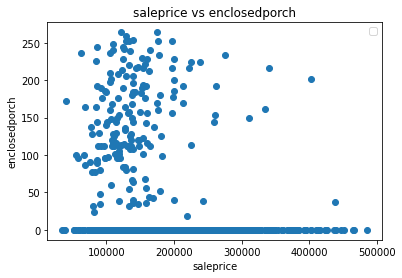

No handles with labels found to put in legend.


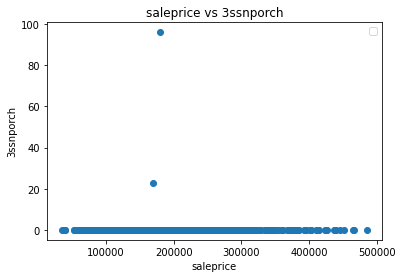

No handles with labels found to put in legend.


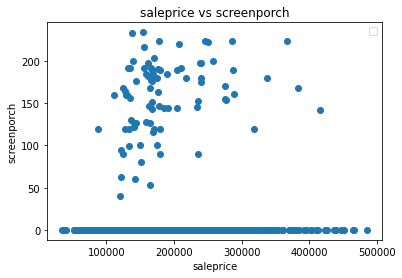

No handles with labels found to put in legend.


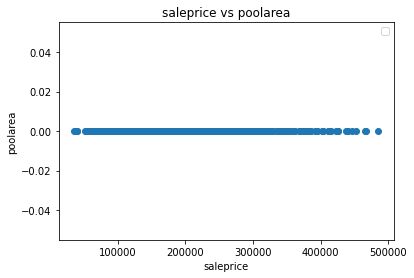

No handles with labels found to put in legend.


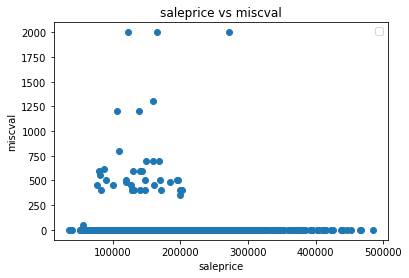

No handles with labels found to put in legend.


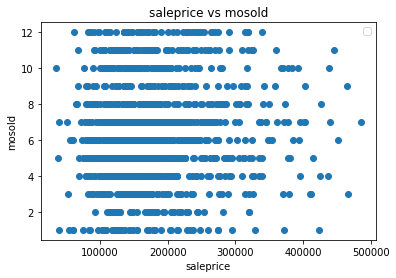

No handles with labels found to put in legend.


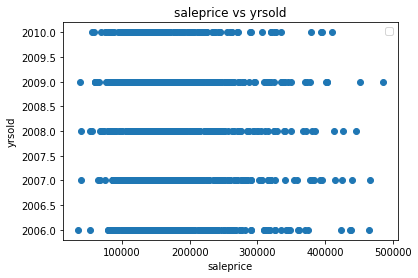

No handles with labels found to put in legend.


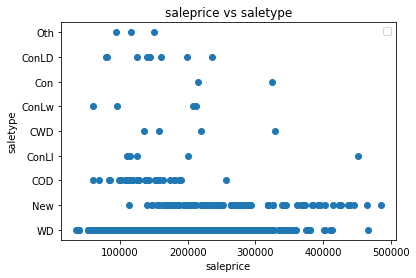

No handles with labels found to put in legend.


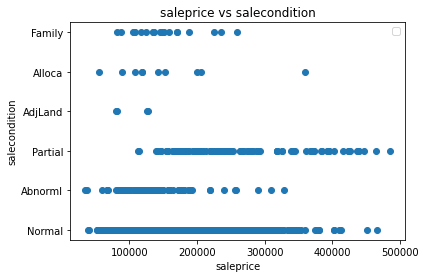

No handles with labels found to put in legend.


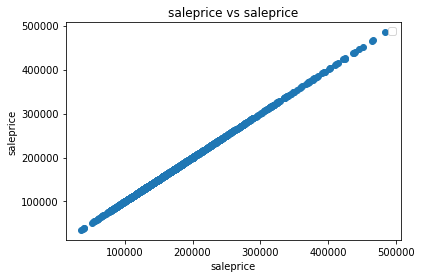

In [ ]:
# plotting the factors against saleprice to see the distribution and relationships.
x_col = "saleprice"
y_columns = clean_data.columns


for y_col in y_columns:

    figure = plt.figure
    ax = plt.gca()
    ax.scatter(clean_data[x_col], clean_data[y_col])
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.set_title("{} vs {}".format(x_col, y_col))

    plt.legend()
    plt.show()

From the above plots, we can see a kind of bias on some columns which we are going to remove. The columns are:
- street
- utilities
- condition2
- roofmat1
- bsmtfinsf2
- lowqualfinsf
- 3ssnporch
- poolarea
- miscval

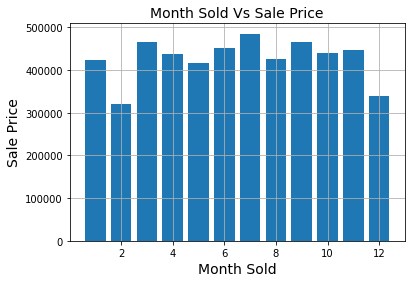

In [ ]:
# seeing the trend in saleprice over months
plt.bar(clean_data['mosold'], clean_data['saleprice'])
plt.title('Month Sold Vs Sale Price', fontsize=14)
plt.xlabel('Month Sold', fontsize=14)
plt.ylabel('Sale Price', fontsize=14)
plt.grid(True)
plt.show()

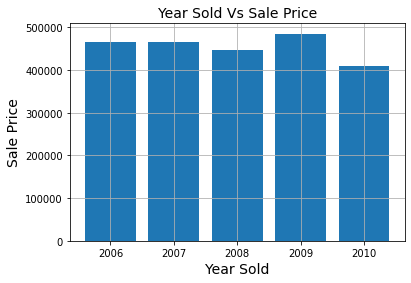

In [ ]:
# seeing the trend in saleprice over months
plt.bar(clean_data['yrsold'], clean_data['saleprice'])
plt.title('Year Sold Vs Sale Price', fontsize=14)
plt.xlabel('Year Sold', fontsize=14)
plt.ylabel('Sale Price', fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
# dropping the columns named previously.
clean_data = clean_data.drop(columns=['street', 'utilities', 'condition2', 'roofmatl', 'bsmtfinsf2', 'lowqualfinsf', '3ssnporch', 'poolarea', 'miscval'])
clean_data.shape

(1319, 58)

We now have 58 columns to work with.

We are now going to find the correlation between them inorder for us to get rid of multicollinearity between involved columns.

In [ ]:
# converting the categorical variables tu numeric form (integers).
categorical_feature_mask = clean_data.dtypes==object
categorical_cols = clean_data.columns[categorical_feature_mask].tolist()
categorical_cols
# import labelencoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# apply le on categorical feature columns
clean_data[categorical_cols] = clean_data[categorical_cols].apply(lambda col: le.fit_transform(col))
clean_data.head(10)

,mssubclass,mszoning,lotarea,lotshape,landcontour,lotconfig,landslope,neighborhood,condition1,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,grlivarea,bsmtfullbath,fullbath,halfbath,bedroomabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,garagecars,garagearea,paveddrive,wooddecksf,openporchsf,enclosedporch,screenporch,mosold,yrsold,saletype,salecondition,saleprice
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,3,8450,3,3,4,0,5,2,0,5,7,5,2003,2003,1,11,13,1,196.0,2,4,2,2,3,3,2,706,5,150,856,1,0,1,4,856,854,1710,1,2,1,3,2,8,5,0,2,548,2,0,61,0,0,2,2008,8,4,208500
2,20,3,9600,3,3,2,0,24,1,0,2,6,8,1976,1976,1,8,8,2,0.0,3,4,1,2,3,1,0,978,5,284,1262,1,0,1,4,1262,0,1262,0,2,0,3,3,6,5,1,2,460,2,298,0,0,0,5,2007,8,4,181500
3,60,3,11250,0,3,4,0,5,2,0,5,7,5,2001,2002,1,11,13,1,162.0,2,4,2,2,3,2,2,486,5,434,920,1,0,1,4,920,866,1786,1,2,1,3,2,6,5,1,2,608,2,0,42,0,0,9,2008,8,4,223500
5,60,3,14260,0,3,2,0,15,2,0,5,8,5,2000,2000,1,11,13,1,350.0,2,4,2,2,3,0,2,655,5,490,1145,1,0,1,4,1145,1053,2198,1,2,1,4,2,9,5,1,3,836,2,192,84,0,0,12,2008,8,4,250000
7,20,3,10084,3,3,4,0,21,2,0,2,8,5,2004,2005,1,11,13,3,186.0,2,4,2,0,3,0,2,1369,5,317,1686,1,0,1,4,1694,0,1694,1,2,0,3,2,7,5,1,2,636,2,255,57,0,0,8,2007,8,4,307000
8,60,3,10382,0,3,0,0,14,4,0,5,7,6,1973,1973,1,6,6,3,240.0,3,4,1,2,3,2,0,859,1,216,1107,1,0,1,4,1107,983,2090,1,2,1,3,3,7,5,2,2,484,2,235,204,228,0,11,2009,8,4,200000
9,50,4,6120,3,3,4,0,17,0,0,0,7,5,1931,1950,1,3,15,2,0.0,3,4,0,3,3,3,5,0,5,952,952,1,2,1,1,1022,752,1774,0,2,0,2,3,8,2,2,2,468,2,90,0,205,0,4,2008,8,0,129900
10,190,3,7420,3,3,0,0,3,0,1,1,5,6,1939,1950,1,8,8,2,0.0,3,4,0,3,3,3,2,851,5,140,991,1,0,1,4,1077,0,1077,1,1,0,2,3,5,5,2,1,205,2,0,4,0,0,1,2008,8,4,118000
11,20,3,11200,3,3,4,0,19,2,0,2,5,5,1965,1965,3,6,6,2,0.0,3,4,1,3,3,3,4,906,5,134,1040,1,0,1,4,1040,0,1040,1,1,0,3,3,5,5,0,1,384,2,0,0,0,0,2,2008,8,4,129500


### **Multicollinearity**

In [ ]:
# separating the independent variables
independent_var = clean_data.drop(columns='saleprice')
independent_var.head()

,mssubclass,mszoning,lotarea,lotshape,landcontour,lotconfig,landslope,neighborhood,condition1,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,grlivarea,bsmtfullbath,fullbath,halfbath,bedroomabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,garagecars,garagearea,paveddrive,wooddecksf,openporchsf,enclosedporch,screenporch,mosold,yrsold,saletype,salecondition
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,3,8450,3,3,4,0,5,2,0,5,7,5,2003,2003,1,11,13,1,196.0,2,4,2,2,3,3,2,706,5,150,856,1,0,1,4,856,854,1710,1,2,1,3,2,8,5,0,2,548,2,0,61,0,0,2,2008,8,4
2,20,3,9600,3,3,2,0,24,1,0,2,6,8,1976,1976,1,8,8,2,0.0,3,4,1,2,3,1,0,978,5,284,1262,1,0,1,4,1262,0,1262,0,2,0,3,3,6,5,1,2,460,2,298,0,0,0,5,2007,8,4
3,60,3,11250,0,3,4,0,5,2,0,5,7,5,2001,2002,1,11,13,1,162.0,2,4,2,2,3,2,2,486,5,434,920,1,0,1,4,920,866,1786,1,2,1,3,2,6,5,1,2,608,2,0,42,0,0,9,2008,8,4
5,60,3,14260,0,3,2,0,15,2,0,5,8,5,2000,2000,1,11,13,1,350.0,2,4,2,2,3,0,2,655,5,490,1145,1,0,1,4,1145,1053,2198,1,2,1,4,2,9,5,1,3,836,2,192,84,0,0,12,2008,8,4
7,20,3,10084,3,3,4,0,21,2,0,2,8,5,2004,2005,1,11,13,3,186.0,2,4,2,0,3,0,2,1369,5,317,1686,1,0,1,4,1694,0,1694,1,2,0,3,2,7,5,1,2,636,2,255,57,0,0,8,2007,8,4


In [ ]:
# calculating for the VIF in each feature
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = independent_var.columns
vif_data["VIF"] = [variance_inflation_factor(independent_var.values, i)
for i in range(len(independent_var.columns))]  
print(vif_data)

          feature           VIF
0      mssubclass     15.444930
1        mszoning     31.296899
2         lotarea     10.769496
3        lotshape      3.780459
4     landcontour     23.515530
5       lotconfig      5.102206
6       landslope      1.327354
7    neighborhood      6.547643
8      condition1      7.610265
9        bldgtype      5.902009
10     housestyle      8.282039
11    overallqual     80.837830
12    overallcond     51.806842
13      yearbuilt  29677.408921
14   yearremodadd  26241.031871
15      roofstyle      4.906204
16    exterior1st     45.305470
17    exterior2nd     37.172701
18     masvnrtype     12.443258
19     masvnrarea      2.206289
20      exterqual     43.649561
21      extercond     34.562243
22     foundation     10.576929
23       bsmtqual     18.199944
24       bsmtcond     23.130286
25   bsmtexposure      7.683978
26   bsmtfintype1      6.773110
27     bsmtfinsf1     85.932875
28   bsmtfintype2     90.783825
29      bsmtunfsf    118.985708
30    to

We have several columns with a very high vif and we are going to drop some of them and see the behaviour of the vif values.

In [ ]:
clean_data = clean_data.drop(columns=['yearremodadd', 'yrsold', '1stflrsf', '2ndflrsf', 'bsmtfintype2', 'bsmtunfsf'])

In [ ]:
# calculating for the VIF in each feature
independent_var = clean_data.drop(columns='saleprice')
vif_data = pd.DataFrame()
vif_data["feature"] = independent_var.columns
vif_data["VIF"] = [variance_inflation_factor(independent_var.values, i)
for i in range(len(independent_var.columns))]  
print(vif_data)

          feature         VIF
0      mssubclass   14.057760
1        mszoning   30.753184
2         lotarea   10.548973
3        lotshape    3.724167
4     landcontour   23.386656
5       lotconfig    5.082189
6       landslope    1.320977
7    neighborhood    6.410775
8      condition1    7.475007
9        bldgtype    5.385679
10     housestyle    7.742439
11    overallqual   77.351164
12    overallcond   38.487306
13      yearbuilt  476.969047
14      roofstyle    4.833790
15    exterior1st   44.838146
16    exterior2nd   36.930139
17     masvnrtype   12.291344
18     masvnrarea    2.192220
19      exterqual   42.661943
20      extercond   34.290311
21     foundation    9.065863
22       bsmtqual   17.961921
23       bsmtcond   22.937773
24   bsmtexposure    7.394869
25   bsmtfintype1    6.535975
26     bsmtfinsf1    6.106421
27    totalbsmtsf   21.820874
28        heating   17.265351
29      heatingqc    2.796414
30     centralair   25.325355
31     electrical   17.671880
32      gr

There are still some high values. We will continue untill we find reasonable values.

In [ ]:
clean_data = clean_data.drop(columns = ['overallqual', 'yearbuilt', 'grlivarea', 'totrmsabvgrd', 'functional'])

In [ ]:
# calculating for the VIF in each feature
independent_var = clean_data.drop(columns='saleprice')
vif_data = pd.DataFrame()
vif_data["feature"] = independent_var.columns
vif_data["VIF"] = [variance_inflation_factor(independent_var.values, i)
for i in range(len(independent_var.columns))]  
print(vif_data)

          feature        VIF
0      mssubclass  13.002085
1        mszoning  28.331297
2         lotarea  10.265681
3        lotshape   3.695833
4     landcontour  22.276642
5       lotconfig   5.009232
6       landslope   1.273767
7    neighborhood   6.287812
8      condition1   7.379344
9        bldgtype   5.143589
10     housestyle   7.570668
11    overallcond  33.238050
12      roofstyle   4.733553
13    exterior1st  44.026351
14    exterior2nd  36.577619
15     masvnrtype  11.417080
16     masvnrarea   2.143678
17      exterqual  39.215352
18      extercond  32.202845
19     foundation   8.392843
20       bsmtqual  17.123033
21       bsmtcond  22.612601
22   bsmtexposure   7.201300
23   bsmtfintype1   6.166275
24     bsmtfinsf1   6.063681
25    totalbsmtsf  18.377625
26        heating  15.579020
27      heatingqc   2.753892
28     centralair  24.383549
29     electrical  17.255918
30   bsmtfullbath   3.291262
31       fullbath  21.306370
32       halfbath   2.582644
33   bedroomab

In [ ]:
clean_data =clean_data.drop(columns=['overallcond', 'exterior1st', 'exterior2nd', 'exterqual', 'garagecars'])

In [ ]:
# calculating for the VIF in each feature
independent_var = clean_data.drop(columns='saleprice')
vif_data = pd.DataFrame()
vif_data["feature"] = independent_var.columns
vif_data["VIF"] = [variance_inflation_factor(independent_var.values, i)
for i in range(len(independent_var.columns))]  
print(vif_data)

          feature        VIF
0      mssubclass  12.652230
1        mszoning  25.688190
2         lotarea  10.200661
3        lotshape   3.675229
4     landcontour  22.110194
5       lotconfig   4.979580
6       landslope   1.257209
7    neighborhood   6.185356
8      condition1   7.348464
9        bldgtype   4.941216
10     housestyle   7.454756
11      roofstyle   4.639552
12     masvnrtype  11.193971
13     masvnrarea   2.119704
14      extercond  31.413905
15     foundation   8.019463
16       bsmtqual  15.584732
17       bsmtcond  22.417300
18   bsmtexposure   7.125336
19   bsmtfintype1   6.080217
20     bsmtfinsf1   6.000029
21    totalbsmtsf  18.214545
22        heating  15.348161
23      heatingqc   2.620187
24     centralair  22.832466
25     electrical  16.773926
26   bsmtfullbath   3.260098
27       fullbath  20.480686
28       halfbath   2.502515
29   bedroomabvgr  23.900154
30    kitchenqual  15.084362
31     fireplaces   2.536143
32     garagearea  11.415469
33     paveddr

In [ ]:
clean_data = clean_data.drop(columns = ['mszoning', 'landcontour', 'extercond', 'bsmtcond', 'heating', 'centralair', 'fullbath', 'bedroomabvgr', 'paveddrive', 'saletype'])

In [ ]:
# calculating for the VIF in each feature
independent_var = clean_data.drop(columns='saleprice')
vif_data = pd.DataFrame()
vif_data["feature"] = independent_var.columns
vif_data["VIF"] = [variance_inflation_factor(independent_var.values, i)
for i in range(len(independent_var.columns))]  
print(vif_data)

          feature        VIF
0      mssubclass  11.247050
1         lotarea   9.630711
2        lotshape   3.582873
3       lotconfig   4.889940
4       landslope   1.120052
5    neighborhood   5.850117
6      condition1   7.120288
7        bldgtype   4.365319
8      housestyle   7.062723
9       roofstyle   4.584125
10     masvnrtype  10.554436
11     masvnrarea   2.088914
12     foundation   6.875416
13       bsmtqual  13.184074
14   bsmtexposure   6.643186
15   bsmtfintype1   5.772497
16     bsmtfinsf1   5.924883
17    totalbsmtsf  15.333035
18      heatingqc   2.498413
19     electrical  14.819297
20   bsmtfullbath   3.148407
21       halfbath   2.285065
22    kitchenqual  13.481453
23     fireplaces   2.460759
24     garagearea  10.594491
25     wooddecksf   1.945960
26    openporchsf   1.919766
27  enclosedporch   1.311643
28    screenporch   1.147594
29         mosold   6.431752
30  salecondition  13.845189


In [ ]:
clean_data = clean_data.drop(columns = ['mssubclass', 'totalbsmtsf', 'electrical', 'kitchenqual', 'salecondition', 'bsmtexposure'])

In [ ]:
# calculating for the VIF in each feature
independent_var = clean_data.drop(columns='saleprice')
vif_data = pd.DataFrame()
vif_data["feature"] = independent_var.columns
vif_data["VIF"] = [variance_inflation_factor(independent_var.values, i)
for i in range(len(independent_var.columns))]  
print(vif_data)

          feature       VIF
0         lotarea  9.125177
1        lotshape  3.506846
2       lotconfig  4.787920
3       landslope  1.100075
4    neighborhood  5.642950
5      condition1  6.815329
6        bldgtype  1.541026
7      housestyle  4.567778
8       roofstyle  4.411280
9      masvnrtype  9.654949
10     masvnrarea  2.021322
11     foundation  6.597710
12       bsmtqual  8.880058
13   bsmtfintype1  5.564012
14     bsmtfinsf1  5.516005
15      heatingqc  2.341994
16   bsmtfullbath  3.132500
17       halfbath  2.110118
18     fireplaces  2.382208
19     garagearea  9.447588
20     wooddecksf  1.901244
21    openporchsf  1.875970
22  enclosedporch  1.275853
23    screenporch  1.144899
24         mosold  6.311243


Our values for the remaining columns are now all below 10. We will now work with these for our regression and determine the important factors from there.

## **Linear Regression Model**

In [ ]:
# splitting the data into X and Y.
X = clean_data[independent_var.columns]
Y = clean_data['saleprice']
X.head()

,lotarea,lotshape,lotconfig,landslope,neighborhood,condition1,bldgtype,housestyle,roofstyle,masvnrtype,masvnrarea,foundation,bsmtqual,bsmtfintype1,bsmtfinsf1,heatingqc,bsmtfullbath,halfbath,fireplaces,garagearea,wooddecksf,openporchsf,enclosedporch,screenporch,mosold
id,,,,,,,,,,,,,,,,,,,,,,,,,
1,8450,3,4,0,5,2,0,5,1,1,196.0,2,2,2,706,0,1,1,0,548,0,61,0,0,2
2,9600,3,2,0,24,1,0,2,1,2,0.0,1,2,0,978,0,0,0,1,460,298,0,0,0,5
3,11250,0,4,0,5,2,0,5,1,1,162.0,2,2,2,486,0,1,1,1,608,0,42,0,0,9
5,14260,0,2,0,15,2,0,5,1,1,350.0,2,2,2,655,0,1,1,1,836,192,84,0,0,12
7,10084,3,4,0,21,2,0,2,1,3,186.0,2,0,2,1369,0,1,0,1,636,255,57,0,0,8


In [ ]:
# using the train_test_split with a 80-20 ratio
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
#implementing the linear regression model
from sklearn.linear_model import LinearRegression
linregressor = LinearRegression()
linregressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#determining the metrics for success for our model
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
y_pred_lin = linregressor.predict(X_test)
lin_mse = mean_squared_error(y_pred_lin, y_test)
lin_rmse = np.sqrt(lin_mse)
lin_mae = mean_absolute_error(y_pred_lin, y_test)

print('Linear Regression R squared: %.4f' % regressor.score(X_test, y_test))
print('Linear Regression RMSE: %.4f' % lin_rmse)
print('Linear Regression MAE: %.4f' % lin_mae)

Linear Regression R squared: 0.7742
Linear Regression RMSE: 35391.7556
Linear Regression MAE: 26377.1212


## **Ridge Regression**

In [ ]:
# creating and fitting our ridgre regression model
from sklearn.ensemble import RandomForestRegressor
forest_regressor = RandomForestRegressor(random_state=42)
forest_regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
#determining the metrics for success for our model
y_pred_forest = forest_regressor.predict(X_test)
forest_mse = mean_squared_error(y_pred_forest, y_test)
forest_rmse = np.sqrt(forest_mse)
forest_mae = mean_absolute_error(y_pred_forest, y_test)

print('Forest Regression R squared: %.4f' % forest_regressor.score(X_test, y_test))
print('Forest Regression RMSE: %.4f' % forest_rmse)
print('Forest Regression MAE: %.4f' % forest_mae)

Forest Regression R squared: 0.7960
Forest Regression RMSE: 33461.3078
Forest Regression MAE: 23567.5198


## **Gradient Boosting**

In [ ]:
# creating and fitting the gradient boost regressor model
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor
grad_model = ensemble.GradientBoostingRegressor()
grad_model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
#determining the metrics for success for our model
y_pred_grad = grad_model.predict(X_test)
grad_mse = mean_squared_error(y_pred_grad, y_test)
grad_rmse = np.sqrt(grad_mse)
grad_mae = mean_absolute_error(y_pred_grad, y_test)

print('Gradient Regression R squared: %.4f' % grad_model.score(X_test, y_test))
print('Gradient Regression RMSE: %.4f' % grad_rmse)
print('Gradient Regression MAE: %.4f' % grad_mae)

Gradient Regression R squared: 0.8287
Gradient Regression RMSE: 30661.8929
Gradient Regression MAE: 21637.4282


## **Feature Importance**

In [ ]:
#calculating for feature importance and arranging the factors to see the most important as well as the least important.
feature_labels = np.array(independent_var.columns)
importance = grad_model.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
  print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

lotshape-0.03%
bsmtfullbath-0.04%
masvnrtype-0.08%
bsmtfintype1-0.14%
landslope-0.21%
bldgtype-0.22%
lotconfig-0.22%
enclosedporch-0.25%
housestyle-0.25%
screenporch-0.28%
mosold-0.29%
condition1-0.36%
roofstyle-0.45%
wooddecksf-1.19%
heatingqc-1.72%
neighborhood-2.34%
halfbath-2.79%
openporchsf-3.33%
foundation-3.73%
masvnrarea-5.45%
bsmtfinsf1-5.92%
lotarea-6.56%
fireplaces-6.81%
bsmtqual-18.44%
garagearea-38.91%


The important factors to be considered are:
- Garage area
- Basement Quality
- Fireplaces

and so on.